In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
digit_mnist=keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=digit_mnist.load_data()

11493376/11490434 [==============================] - 6s 0us/step


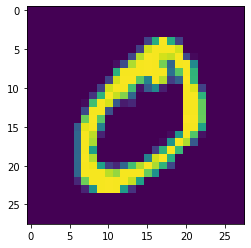

In [3]:
plt.imshow(x_train_full[1])

In [4]:
y_train_full[1] #digit = 0

0

In [5]:
#normalising the data
x_train_n=x_train_full/255.0
x_test_n=x_test/255.0

In [6]:
#splitting data into train/validate/test
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
weights,biases=model.layers[1].get_weights()  #initial random weights & biases assigned
print(weights)

[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]


In [11]:
weights.shape

(784, 300)

In [12]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0483 - accuracy: 0.7215 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.9111 - val_loss: 0.2473 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9255 - val_loss: 0.2060 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2133 - accuracy: 0.9391 - val_loss: 0.1824 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1859 - accuracy: 0.9466 - val_loss: 0.1645 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1652 - accuracy: 0.9518 - val_loss: 0.1483 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9591 - val_loss: 0.1368 - val_accuracy:

In [15]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [16]:
model_history.history

{'loss': [0.6196319460868835,
  0.2953492999076843,
  0.2430279701948166,
  0.20758239924907684,
  0.1810857206583023,
  0.16032728552818298,
  0.14312878251075745,
  0.12918995320796967,
  0.11744081974029541,
  0.1077207624912262,
  0.09876123070716858,
  0.09110444784164429,
  0.08427973836660385,
  0.07805919647216797,
  0.07257728278636932,
  0.06766040623188019,
  0.06317174434661865,
  0.059195972979068756,
  0.0554620623588562,
  0.05192597210407257,
  0.04878319054841995,
  0.045797333121299744,
  0.04309234023094177,
  0.040337372571229935,
  0.03831542655825615,
  0.03593943640589714,
  0.03398992121219635,
  0.032082442194223404,
  0.02996664308011532,
  0.028481313958764076],
 'accuracy': [0.8404726982116699,
  0.9151272773742676,
  0.9301454424858093,
  0.940672755241394,
  0.9486363530158997,
  0.9542727470397949,
  0.959672749042511,
  0.9632545709609985,
  0.9672545194625854,
  0.9696363806724548,
  0.9720363616943359,
  0.974436342716217,
  0.9761818051338196,
  0.978

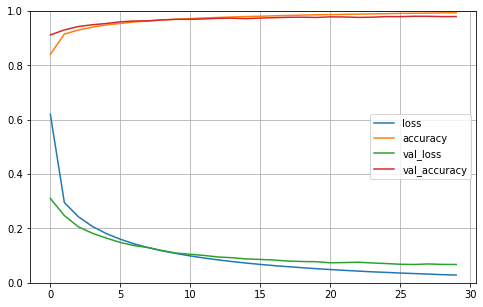

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9796


[0.06893561035394669, 0.9796000123023987]

In [21]:
#testing
x_new=x_test[:5]

In [22]:
#probabilities of each test image taken
y_prob=model.predict(x_new) #we have 10 types of items, we get each one's probability
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
#Predictions
y_pred=model.predict_classes(x_new)#tell the class label directly
y_pred

/home/umar/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4])

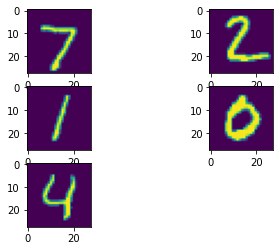

In [29]:
plt.figure()

plt.subplot(3,2,1),plt.imshow(x_test[0]);
plt.subplot(3,2,2),plt.imshow(x_test[1]);
plt.subplot(3,2,3),plt.imshow(x_test[2]);
plt.subplot(3,2,4),plt.imshow(x_test[3]);
plt.subplot(3,2,5),plt.imshow(x_test[4]);
# plt.imshow(x_test[0])
# plt.imshow(x_test[1])